# Clustering Assignments

## 1. K-Means Clustering

In [1]:
# 1. Read in the cereal.csv file
import pandas as pd

df = pd.read_csv('../Data/cereal.csv')
df.head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,100%_Bran,Nabisco,70,4,1,6,25
1,100%_Natural_Bran,Quaker Oats,120,3,5,8,0
2,All-Bran,Kelloggs,70,4,1,5,25
3,All-Bran_with_Extra_Fiber,Kelloggs,50,4,0,0,25
4,Almond_Delight,Ralston Purina,110,2,2,8,25


In [2]:
# 2. Prep the data by dropping the name and manufacturer columns: aka only keep the numeric columns
print(df.dtypes)
#cereal = cereal[['Calories', 'Protein (g)', 'Fat', 'Sugars', 'Vitamins and Minerals']]
# OR
data = df.drop(columns=['Cereal Name','Manufacturer'])
data.head()

Cereal Name              object
Manufacturer             object
Calories                  int64
Protein (g)               int64
Fat                       int64
Sugars                    int64
Vitamins and Minerals     int64
dtype: object


,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,70,4,1,6,25
1,120,3,5,8,0
2,70,4,1,5,25
3,50,4,0,0,25
4,110,2,2,8,25


In [3]:
# 3. Fit a K-Means Clustering model with 2 clusters
# Remove warning:
import os
os.environ["OMP_NUM_THREADS"] = "1"

from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters=2, n_init='auto', random_state=42)
kmeans2.fit(data) # Initializes clustering logic

KMeans(n_clusters=2, random_state=42)

In [4]:
# 4. Interpret the cluster centers
import seaborn as sns

pd.DataFrame(kmeans2.cluster_centers_, columns=data.columns)

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,104.558824,2.485294,0.955882,6.808824,22.058824
1,116.666667,2.666667,0.833333,6.333333,100.000000


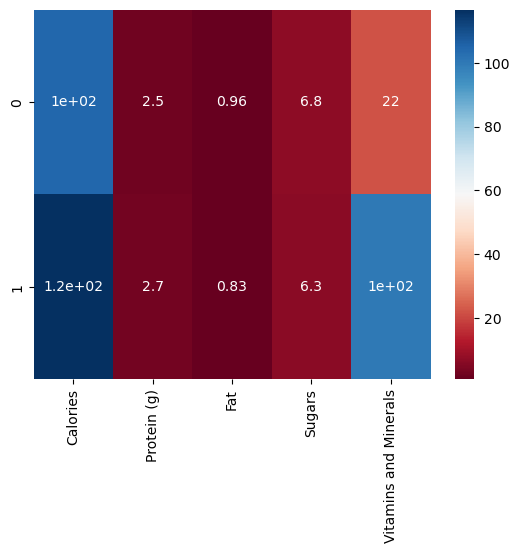

In [5]:
sns.heatmap(pd.DataFrame(kmeans2.cluster_centers_, columns=data.columns), cmap='RdBu', annot=True);

In [6]:
# Cluster 0: Low in vitamins and minerals (cereals for kids)
# Cluster 1: High in calories and vitamins and minerals (cereals for adults)

## 2. Inertia Plot

In [7]:
# 1. Write a loop to fit K-Means Clustering models with 2 to 15 clusters
inertia_values = []

for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(data)
    #print(kmeans.inertia_)
    inertia_values.append(kmeans.inertia_)

inertia_values

[30041.73039215686,
 17167.537634408603,
 12430.331666666667,
 9765.241666666661,
 7403.834045584044,
 5690.000712250711,
 3951.448148148148,
 3097.281481481481,
 2676.448148148147,
 2078.190572390572,
 1657.5700534759355,
 1281.7145104895108,
 1178.2145104895108,
 779.2637529137528]

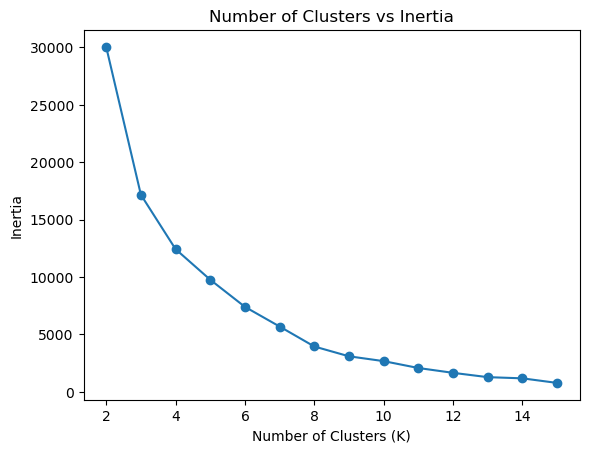

In [8]:
# 2. Create a plot with the number of clusters on the x-axis and the inertia on the y-axis
import matplotlib.pyplot as plt

inertia_series = pd.Series(inertia_values, index=range(2,16))
inertia_series.plot(marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Number of Clusters vs Inertia');

In [9]:
# 3. Identify the elbow of the plot
# K = 3, maybe 4?

In [10]:
# 4. Fit a K-Means Clustering model on the specific number of clusters at the elbow
kmeans3 = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans3.fit(data) # Initializes clustering logic

KMeans(n_clusters=3, random_state=42)

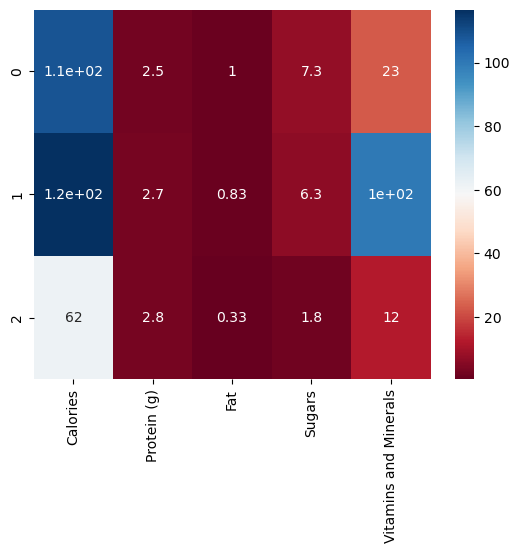

In [11]:
# 5. Interpret the cluster centers using a heat map
sns.heatmap(pd.DataFrame(kmeans3.cluster_centers_, columns=data.columns), cmap='RdBu', annot=True);

In [12]:
# Cluster 0: In the middle (typical cereals)
# Cluster 1: High in caloriesm high in vitamins and minerals (hearty cereals)
# Cluster 2: Average/low in calories, low in vitamins and minerals (empty cereals)

## 3. Tune the K-Means Model

In [13]:
# 1. Remove the ”Fat” column
data.head()

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,70,4,1,6,25
1,120,3,5,8,0
2,70,4,1,5,25
3,50,4,0,0,25
4,110,2,2,8,25


In [14]:
data_subset = data.drop(columns=['Fat'])
data_subset.head()

,Calories,Protein (g),Sugars,Vitamins and Minerals
0,70,4,6,25
1,120,3,8,0
2,70,4,5,25
3,50,4,0,25
4,110,2,8,25


In [15]:
# 2. Standardize the remaining columns
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
standardized = std_scaler.fit_transform(data_subset)
data_scaled = pd.DataFrame(standardized, columns=data_subset.columns)
data_scaled.head()

,Calories,Protein (g),Sugars,Vitamins and Minerals
0,-1.940286,1.387392,-0.173586,-0.149270
1,0.789394,0.462464,0.277129,-1.253871
2,-1.940286,1.387392,-0.398944,-0.149270
3,-3.032158,1.387392,-1.525731,-0.149270
4,0.243458,-0.462464,0.277129,-0.149270


In [16]:
# 3a. Write a loop to fit K-Means Clustering models with 2 to 15 clusters


In [17]:
# 1. Write a loop to fit K-Means Clustering models with 2 to 15 clusters
inertia_values_scaled = []

for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(data_scaled)
    inertia_values_scaled.append(kmeans.inertia_)

inertia_values_scaled

[204.64648585518296,
 170.49358018954837,
 116.63218617365143,
 94.96316532688385,
 74.7103286507532,
 65.4899676266228,
 60.19309965745709,
 51.072112011760424,
 41.851750987630034,
 33.907917288548646,
 30.8322768199291,
 27.177882166622126,
 25.001300070054373,
 22.04622210586108]

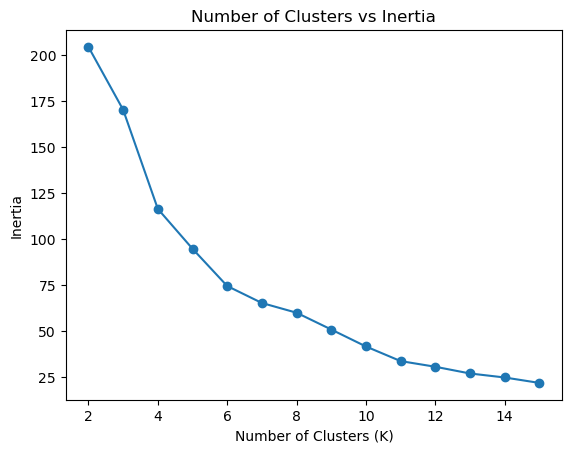

In [18]:
# 2. Create a plot with the number of clusters on the x-axis and the inertia on the y-axis
import matplotlib.pyplot as plt

inertia_series_scaled = pd.Series(inertia_values_scaled, index=range(2,16))
inertia_series_scaled.plot(marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Number of Clusters vs Inertia');

In [19]:
# 3. Identify the elbow of the plot
# (Elbow)K = 4, maybe 6 

In [20]:
# 4. Fit a K-Means Clustering model on the specific number of clusters at the elbow
kmeans6 = KMeans(n_clusters=6, n_init='auto', random_state=42)
kmeans6.fit(data_scaled) # Initializes clustering logic

KMeans(n_clusters=6, random_state=42)

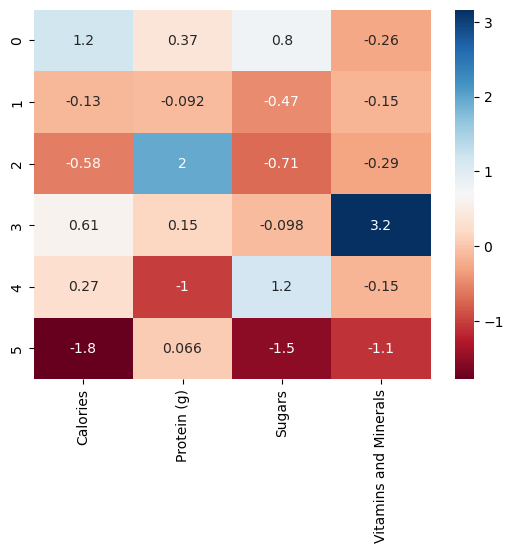

In [21]:
# 5. Interpret the cluster centers using a heat map
sns.heatmap(pd.DataFrame(kmeans6.cluster_centers_, columns=data_scaled.columns), cmap='RdBu', annot=True);

In [22]:
# Cluster 0: high in calories and sugar
# Cluster 1: typical cereals
# Cluster 2: high in protein
# Cluster 3: high in vitamins and minerals
# Cluster 4: high in sugar, low in protein
# Cluster 5: low in calories and sugar and vitamins and minerals

## 4. Select the Best K-Means Model

In [23]:
# 1. Label each row in your original data set with a cluster name from the unstandardized data model and a cluster name from standardized data model
kmeans3.labels_

array([2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0])

In [24]:
kmeans6.labels_

array([2, 0, 2, 5, 1, 4, 4, 0, 1, 1, 4, 2, 4, 1, 4, 1, 1, 4, 4, 1, 5, 1,
       4, 1, 4, 4, 1, 0, 4, 4, 4, 1, 1, 1, 4, 0, 4, 3, 3, 1, 2, 4, 2, 0,
       1, 0, 0, 1, 0, 0, 3, 5, 5, 2, 2, 0, 1, 1, 1, 1, 5, 5, 5, 4, 2, 1,
       3, 3, 3, 1, 4, 1, 1, 1])

In [25]:
model1_clusters = pd.Series(kmeans3.labels_, name='model1_clusters')
model1_names = model1_clusters.map({
    0: 'Typical Cereals',
    1: 'Hearty Cereals',
    2: 'Empty Cereals'
})

model1_names.head()

0      Empty Cereals
1    Typical Cereals
2      Empty Cereals
3      Empty Cereals
4    Typical Cereals
Name: model1_clusters, dtype: object

In [26]:
model2_clusters = pd.Series(kmeans6.labels_, name='model2_clusters')
model2_names = model2_clusters.map({
    0: 'High in Calories and Sugar',
    1: 'Typical Cereals',
    2: 'High Protein',
    3: 'High Vitamins and Minerals',
    4: 'High Sugar, Low Protein',
    5: 'Low Calories'
})

model2_names.head()

0                  High Protein
1    High in Calories and Sugar
2                  High Protein
3                  Low Calories
4               Typical Cereals
Name: model2_clusters, dtype: object

In [27]:
# 2. Look at the number of cereals that fall into each cluster
model1_names.value_counts()

model1_clusters
Typical Cereals    62
Empty Cereals       6
Hearty Cereals      6
Name: count, dtype: int64

In [28]:
model2_names.value_counts()

model2_clusters
Typical Cereals               25
High Sugar, Low Protein       18
High in Calories and Sugar    10
High Protein                   8
Low Calories                   7
High Vitamins and Minerals     6
Name: count, dtype: int64

In [29]:
# 3. Decide on the best model for our client
# Model 2 - 2 displays, 3 displays

In [30]:
# 4. Recommend a specific number of displays
# Kid, Adult, Typical

In [31]:
# 5. Suggest a few cereals that should be shown in each display
df.head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,100%_Bran,Nabisco,70,4,1,6,25
1,100%_Natural_Bran,Quaker Oats,120,3,5,8,0
2,All-Bran,Kelloggs,70,4,1,5,25
3,All-Bran_with_Extra_Fiber,Kelloggs,50,4,0,0,25
4,Almond_Delight,Ralston Purina,110,2,2,8,25


In [32]:
cluster_names = pd.concat([df, model1_names, model2_names], axis=1)
cluster_names.head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,model1_clusters,model2_clusters
0,100%_Bran,Nabisco,70,4,1,6,25,Empty Cereals,High Protein
1,100%_Natural_Bran,Quaker Oats,120,3,5,8,0,Typical Cereals,High in Calories and Sugar
2,All-Bran,Kelloggs,70,4,1,5,25,Empty Cereals,High Protein
3,All-Bran_with_Extra_Fiber,Kelloggs,50,4,0,0,25,Empty Cereals,Low Calories
4,Almond_Delight,Ralston Purina,110,2,2,8,25,Typical Cereals,Typical Cereals


In [33]:
cereal_typical = cluster_names[cluster_names.model2_clusters == 'Typical Cereals']
cereal_typical.head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,model1_clusters,model2_clusters
4,Almond_Delight,Ralston Purina,110,2,2,8,25,Typical Cereals,Typical Cereals
8,Bran_Chex,Ralston Purina,90,2,1,6,25,Typical Cereals,Typical Cereals
9,Bran_Flakes,Post,90,3,0,5,25,Typical Cereals,Typical Cereals
13,Clusters,General Mills,110,3,2,7,25,Typical Cereals,Typical Cereals
15,Corn_Chex,Ralston Purina,110,2,0,3,25,Typical Cereals,Typical Cereals


In [34]:
cluster_names.Manufacturer.value_counts()

Manufacturer
Kelloggs                       23
General Mills                  22
Quaker Oats                     8
Post                            8
Nabisco                         6
Ralston Purina                  6
American Home Food Products     1
Name: count, dtype: int64

In [35]:
cereal_typical[cereal_typical.Manufacturer.isin(['Kelloggs', 'General Mills'])]

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,model1_clusters,model2_clusters
13,Clusters,General Mills,110,3,2,7,25,Typical Cereals,Typical Cereals
16,Corn_Flakes,Kelloggs,100,2,0,2,25,Typical Cereals,Typical Cereals
19,Cracklin'_Oat_Bran,Kelloggs,110,3,3,7,25,Typical Cereals,Typical Cereals
21,Crispix,Kelloggs,110,2,0,3,25,Typical Cereals,Typical Cereals
26,Frosted_Mini-Wheats,Kelloggs,100,3,0,7,25,Typical Cereals,Typical Cereals
39,Kix,General Mills,110,2,1,3,25,Typical Cereals,Typical Cereals
44,Multi-Grain_Cheerios,General Mills,100,2,1,6,25,Typical Cereals,Typical Cereals
47,Nutri-grain_Wheat,Kelloggs,90,3,0,2,25,Typical Cereals,Typical Cereals
56,Raisin_Nut_Bran,General Mills,100,3,2,8,25,Typical Cereals,Typical Cereals
57,Raisin_Squares,Kelloggs,90,2,0,6,25,Typical Cereals,Typical Cereals


In [36]:
# Typical cereal display: corn flakes, cheerios
cereal_sugary = cluster_names[cluster_names.model2_clusters.isin(['High Sugar, Low Protein', 'High in Calories + Sugar'])]
cereal_sugary.head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,model1_clusters,model2_clusters
5,Apple_Cinnamon_Cheerios,General Mills,110,2,2,10,25,Typical Cereals,"High Sugar, Low Protein"
6,Apple_Jacks,Kelloggs,110,2,0,14,25,Typical Cereals,"High Sugar, Low Protein"
10,Cap'n'Crunch,Quaker Oats,120,1,2,12,25,Typical Cereals,"High Sugar, Low Protein"
12,Cinnamon_Toast_Crunch,General Mills,120,1,3,9,25,Typical Cereals,"High Sugar, Low Protein"
14,Cocoa_Puffs,General Mills,110,1,1,13,25,Typical Cereals,"High Sugar, Low Protein"


In [37]:
cereal_sugary.sort_values('Sugars', ascending=False).head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,model1_clusters,model2_clusters
63,Smacks,Kelloggs,110,2,1,15,25,Typical Cereals,"High Sugar, Low Protein"
29,Golden_Crisp,Post,100,2,0,15,25,Typical Cereals,"High Sugar, Low Protein"
6,Apple_Jacks,Kelloggs,110,2,0,14,25,Typical Cereals,"High Sugar, Low Protein"
14,Cocoa_Puffs,General Mills,110,1,1,13,25,Typical Cereals,"High Sugar, Low Protein"
18,Count_Chocula,General Mills,110,1,1,13,25,Typical Cereals,"High Sugar, Low Protein"


In [38]:
# Sugary cereal display: golden crisp, smacks

In [39]:
cereal_healthy = cluster_names[cluster_names.model2_clusters.isin(['High Protein', 'Low Calories', 'High Vitamins and Minerals'])]
cereal_healthy.head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,model1_clusters,model2_clusters
0,100%_Bran,Nabisco,70,4,1,6,25,Empty Cereals,High Protein
2,All-Bran,Kelloggs,70,4,1,5,25,Empty Cereals,High Protein
3,All-Bran_with_Extra_Fiber,Kelloggs,50,4,0,0,25,Empty Cereals,Low Calories
11,Cheerios,General Mills,110,6,2,1,25,Typical Cereals,High Protein
20,Cream_of_Wheat_(Quick),Nabisco,100,3,0,0,0,Typical Cereals,Low Calories


In [40]:
cereal_healthy.sort_values('Protein (g)', ascending=False).head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,model1_clusters,model2_clusters
11,Cheerios,General Mills,110,6,2,1,25,Typical Cereals,High Protein
64,Special_K,Kelloggs,110,6,0,3,25,Typical Cereals,High Protein
54,Quaker_Oatmeal,Quaker Oats,100,5,2,-1,0,Typical Cereals,High Protein
0,100%_Bran,Nabisco,70,4,1,6,25,Empty Cereals,High Protein
53,Quaker_Oat_Squares,Quaker Oats,100,4,1,6,25,Typical Cereals,High Protein


In [41]:
# Healthy cereal display: cheerios, special k.

## 5. Hierarchical Clustering

In [42]:
data.head()

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,70,4,1,6,25
1,120,3,5,8,0
2,70,4,1,5,25
3,50,4,0,0,25
4,110,2,2,8,25


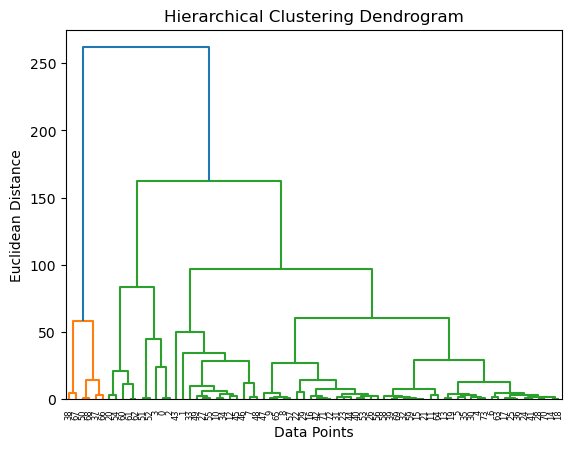

In [43]:
# 1. Create a dendrogram using the 5 numeric fields of the cereal data set
# Visualize the clusters with a dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linkage_matrix = linkage(data, method='ward')
dendrogram_info = dendrogram(linkage_matrix)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance');

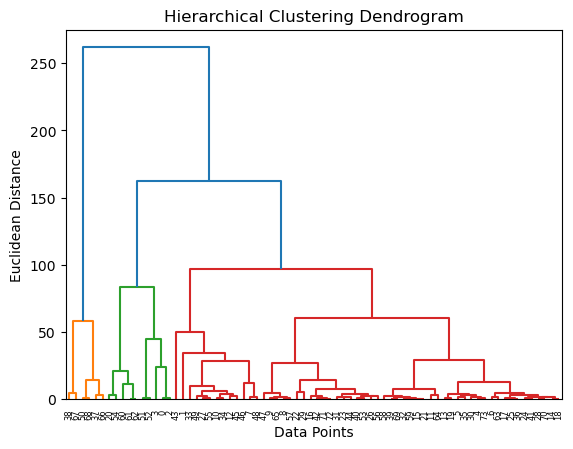

In [44]:
# 2. Visually identify the ”best” number of clusters and adjust the color_threshold
linkage_matrix = linkage(data, method='ward')
dendrogram_info = dendrogram(linkage_matrix, color_threshold=100)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance');

In [45]:
data.head()

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,70,4,1,6,25
1,120,3,5,8,0
2,70,4,1,5,25
3,50,4,0,0,25
4,110,2,2,8,25


In [46]:
data_scaled.head()

,Calories,Protein (g),Sugars,Vitamins and Minerals
0,-1.940286,1.387392,-0.173586,-0.149270
1,0.789394,0.462464,0.277129,-1.253871
2,-1.940286,1.387392,-0.398944,-0.149270
3,-3.032158,1.387392,-1.525731,-0.149270
4,0.243458,-0.462464,0.277129,-0.149270


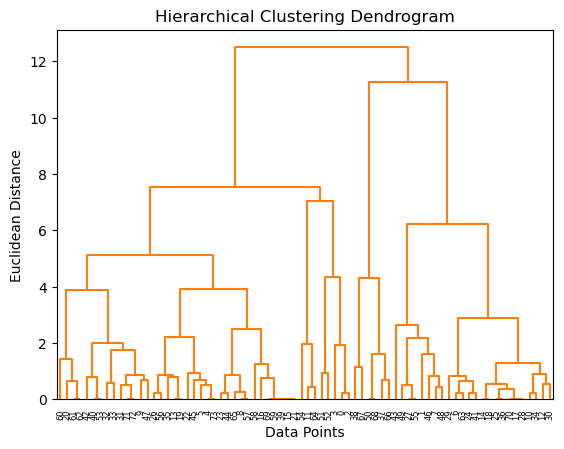

In [47]:
# 3. Create a dendrogram using the 4 numeric, standardized fields (excluding “Fat”) of the cereal data set
linkage_matrix = linkage(data_scaled, method='ward')
dendrogram_info = dendrogram(linkage_matrix, color_threshold=100)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance');

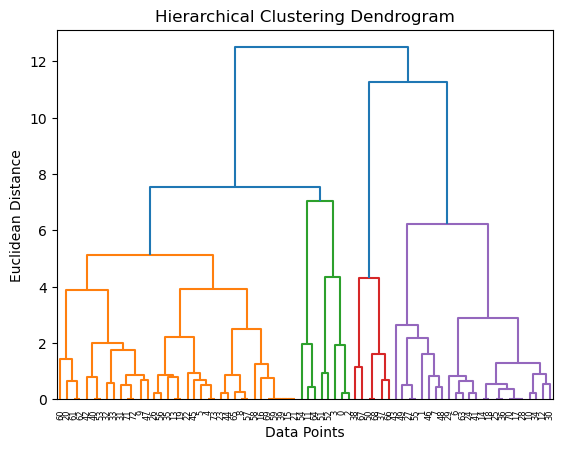

In [48]:
# 4. Visually identify the ”best” number of clusters and adjust the color_threshold
linkage_matrix = linkage(data_scaled, method='ward')
dendrogram_info = dendrogram(linkage_matrix, color_threshold=7.5)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance');

In [49]:
# 5. Fit an agglomerative clustering model on the scaled data set with four clusters and view the labels
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(4)
agg.fit(data_scaled)

AgglomerativeClustering(n_clusters=4)

In [50]:
agg.labels_

array([0, 1, 0, 0, 3, 3, 1, 1, 3, 3, 1, 0, 1, 3, 1, 3, 3, 1, 1, 3, 3, 3,
       3, 3, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1, 3, 1, 2, 2, 3, 3, 1, 3, 1,
       3, 3, 1, 3, 1, 1, 2, 0, 0, 3, 0, 1, 3, 3, 3, 3, 3, 3, 3, 1, 0, 3,
       2, 2, 2, 3, 1, 3, 3, 3], dtype=int64)

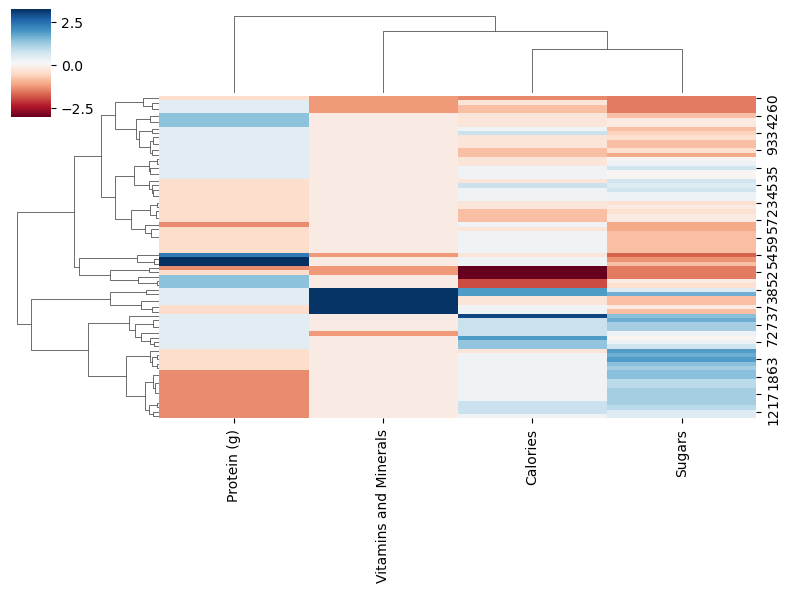

In [51]:
# 6. Create a cluster map of the “best” results and interpret the clusters
clustermap_v2 = sns.clustermap(data_scaled, method='ward', cmap='RdBu', figsize=(8,6), xticklabels=data_scaled.columns)
plt.show()

* Cluster 1: General Cereals
* Cluster 2: +Protein
* Cluster 3: +Vitamins
* Cluster 4: +Sugar

## 6. DBSCAN

In [52]:
# 1. Copy over the function that loops through multiple eps and min_samples values to fit multiple DBSCAN models
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

def tune_dbscan(data):

    results = []
    
    # define a range of eps and min_samples values to loop through
    eps_values = np.arange(.1,2,.1)
    min_samples_values = np.arange(2,10,1)
    
    # loop through the combinations of eps and min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(data)
            labels = dbscan.labels_
    
            # Count the number of clusters (excluding noise points labeled as -1)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    
            # count the number of noise points (labeled as -1)
            n_noise = list(labels).count(-1)
    
            # calculate the silhouette score
            if n_clusters > 1: # silhouette score requires at least 2 clusters
                silhouette = silhouette_score(data, labels, metric='euclidean', sample_size=None)
            else:
                silhouette = None
    
            results.append([eps, min_samples, n_clusters, n_noise, silhouette])
    
    # put the results in a dataframe
    dbscan_results = pd.DataFrame(results, columns=['Eps', 'Min Samples', 'Number of Clusters', 'Number of Noise Points', 'Silhouette Score'])
    
    return dbscan_results

In [58]:
# 2. Apply the function on both the original and standardized data sets
dbscan_results_1 = tune_dbscan(data)
dbscan_results_1.head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
0,0.1,2,7,59,-0.302829
1,0.1,3,1,71,NaN
2,0.1,4,0,74,NaN
3,0.1,5,0,74,NaN
4,0.1,6,0,74,NaN


In [59]:
dbscan_results_2 = tune_dbscan(data_scaled)
dbscan_results_2.head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
0,0.1,2,12,46,-0.013101
1,0.1,3,2,66,-0.213158
2,0.1,4,1,69,NaN
3,0.1,5,1,69,NaN
4,0.1,6,0,74,NaN


In [63]:
# 3. Find the highest silhouette score and note down the eps and min_samples values
dbscan_results_1.sort_values('Silhouette Score', ascending=False).groupby('Silhouette Score').head(1)

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
136,1.8,2,12,23,0.230822
120,1.6,2,13,25,0.154347
145,1.9,3,6,35,0.085334
138,1.8,4,6,36,0.074636
96,1.3,2,13,34,0.051047
129,1.7,3,6,39,0.031516
139,1.8,5,4,46,-0.063081
114,1.5,4,4,49,-0.093904
97,1.3,3,4,52,-0.150983
115,1.5,5,2,57,-0.152856


In [64]:
dbscan_results_2.sort_values('Silhouette Score', ascending=False).groupby('Silhouette Score').head(1)

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
146,1.9,4,2,2,0.435090
138,1.8,4,2,3,0.422208
130,1.7,4,2,6,0.414533
129,1.7,3,2,3,0.413635
113,1.5,3,2,9,0.413283
122,1.6,4,2,8,0.409490
112,1.5,2,5,3,0.409471
106,1.4,4,2,11,0.405512
120,1.6,2,5,2,0.386130
89,1.2,3,2,12,0.384010


In [65]:
# 4. Fit a final DBSCAN model with those eps and min_samples values and view the labels
dbscan_final = DBSCAN(eps=1.9, min_samples=4)
dbscan_final.fit(data_scaled)

DBSCAN(eps=1.9, min_samples=4)

In [66]:
dbscan_final.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,
        1,  0,  0,  0,  0,  0], dtype=int64)

In [68]:
from collections import Counter

Counter(dbscan_final.labels_)

Counter({0: 68, 1: 4, -1: 2})